Test VAE model on random frame of random file in `record`

In [204]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

In [205]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [206]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "./new_record/"
model_path_name = "./tf_vae/"

z_size=32

In [207]:
filelist = os.listdir(DATA_DIR)

In [208]:
# from PIL import Image
# img_list = []
# for i in filelist[:20]:
#     filename = filelist[0]
#     img = Image.open(os.path.join(DATA_DIR, filename))
#     img = img.resize((64,64),Image.ANTIALIAS)
#     img = np.array(img).astype(np.float32)/255.0
#     img_list.append(img)

In [209]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [210]:
obs.shape

(1000, 64, 64, 3)

In [211]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


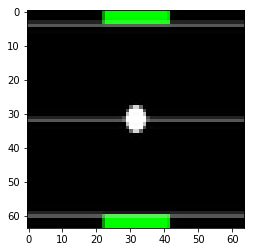

In [212]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(obs[0])
plt.show()

In [ ]:
batch_z = vae.encode(obs)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[ 0.1344  0.815   0.0706 -0.8211  0.8353 -0.2683  0.2996 -1.0206  1.7656 -1.2311 -1.0575 -0.7657
 -1.9445 -3.6225  1.7583 -1.7591  0.2016  0.6015 -0.1893  1.2089  0.0405  1.4007 -1.16    0.2254
  0.4651  0.2499  0.5692  0.4317 -0.4141 -0.5168  0.4775  0.9079]


In [ ]:
# show reconstruction
plt.subplot(221)
plt.imshow(reconstruct[0])
plt.show()

plt.subplot(222)
plt.imshow(reconstruct[5])
plt.show()

plt.subplot(223)
plt.imshow(reconstruct[10])
plt.show()

plt.subplot(224)
plt.imshow(reconstruct[19])
plt.show()

In [ ]:
plt.imshow(reconstruct[0])
plt.savefig('pong_dream.pdf', format='pdf',bbox_inches='tight')